In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import random
from tensorflow.keras import regularizers
from stationarizer import simple_auto_stationarize

In [65]:
df = pd.read_excel("../../EsaveExportBig.xls")
df = df.dropna(axis=1, how="any")
df = df.applymap(lambda cell: float(str(cell).replace(",", ".")))
channels = df.shape[1] # for later

ValueError: could not convert string to float: '01.01.2015 00:00'

       707057500068119547  707057500068755066  ESAVE_193681-980396002_EAN  \
0                0.873116           -1.295592                   -3.134222   
1                1.073106           -1.295581                   -2.134206   
2                0.173096           -1.295571                   -2.134190   
3                0.273085           -1.295561                   -2.134174   
4                0.573075           -1.295551                   -2.134159   
...                   ...                 ...                         ...   
43843           -2.977178           -5.046148                   -3.438128   
43844           -1.977189           -6.046138                   -4.438112   
43845           -2.977199           -5.046127                   -4.438096   
43846           -1.977209           -5.046117                   -3.438080   
43847           -1.977219           -5.046107                   -3.438064   

       707057500068789658  707057500068425556  707057500068402960  \
0     

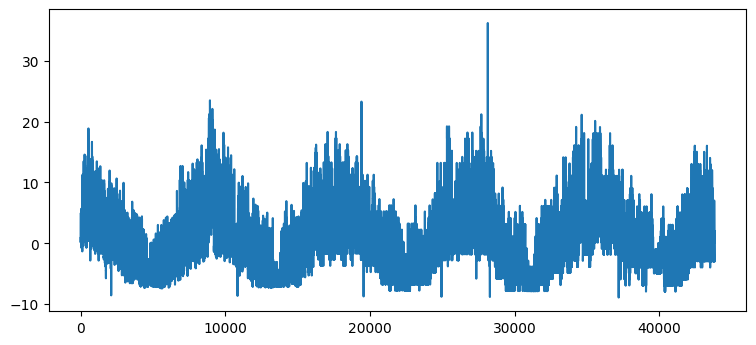

In [64]:
print(df)
values = df.values
print(values)
print(values.shape)
plt.plot(values[:,0])
plt.show()

In [44]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

(43848,)
(41449,)


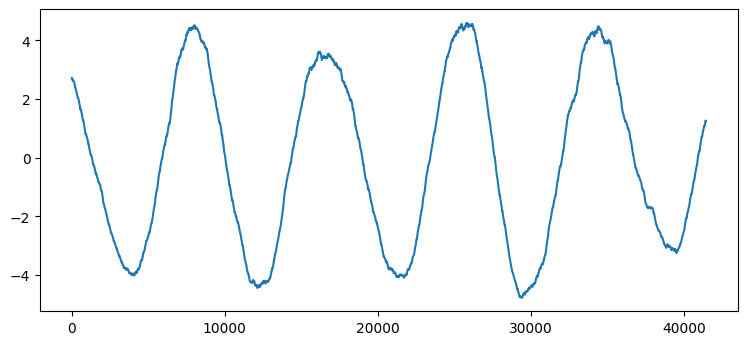

In [61]:
print(values[:,0].shape)
avgs = moving_average(values[:,0], 24*100)
print(avgs.shape)
plt.plot(avgs)
plt.show()

In [3]:
stationarized_df = simple_auto_stationarize(df)
print(stationarized_df)

c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWar

c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWar

       707057500068119547  707057500068755066  ESAVE_193681-980396002_EAN  \
0                0.873116           -1.295592                   -3.134222   
1                1.073106           -1.295581                   -2.134206   
2                0.173096           -1.295571                   -2.134190   
3                0.273085           -1.295561                   -2.134174   
4                0.573075           -1.295551                   -2.134159   
...                   ...                 ...                         ...   
43843           -2.977178           -5.046148                   -3.438128   
43844           -1.977189           -6.046138                   -4.438112   
43845           -2.977199           -5.046127                   -4.438096   
43846           -1.977209           -5.046117                   -3.438080   
43847           -1.977219           -5.046107                   -3.438064   

       707057500068789658  707057500068425556  707057500068402960  \
0     

c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
c:\users\jacob\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:2012: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


[[29.41873902 27.25003127 25.41140084 ... 26.10437217 28.51074922
  27.62400491]
 [29.61872875 27.25004152 26.41141671 ... 26.30439822 29.51074004
  27.7240079 ]
 [28.71871848 27.25005177 26.41143259 ... 26.50442427 28.51073086
  27.62401089]
 ...
 [25.56842403 23.49949541 24.1075271  ... 27.64669196 29.10838391
  27.15523433]
 [26.56841376 23.49950566 25.10754298 ... 28.64671802 28.10837474
  28.15523733]
 [26.56840349 23.49951591 25.10755886 ... 26.64674407 28.10836556
  27.15524032]]
(43848, 81) (43681, 168, 81) (34944, 168, 81) (8737, 168, 81)


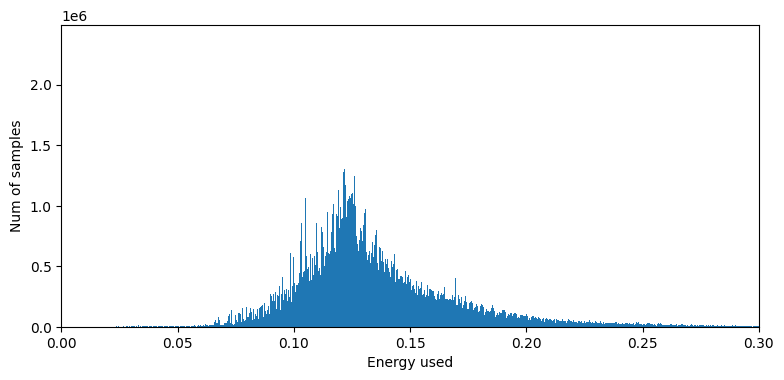

In [31]:
df = stationarized_df
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':100})
time_steps = 24*7 # 168

# normaliser på en annen måte probably
"""
mean = df.values.mean()
std = df.values.std()
values = (df.values - mean)/std
"""
values = df.values
sample_min = values.min().min()
values = values - sample_min
print(values)
X = []

for i in range(len(values) - time_steps + 1):
    X.append(values[i : (i + time_steps)])
        
X = np.stack(X)
sample_max = X.max().max()
X = X/sample_max

samples = X.shape[0]
train_samples = int(samples*0.8)
x_train = X[:train_samples]
x_test = X[train_samples:]

print(values.shape, X.shape, x_train.shape, x_test.shape)

plt.hist(X.flatten(), bins="auto")
plt.xlabel("Energy used")
plt.ylabel("Num of samples")
plt.xlim(0,0.3)

plt.show()

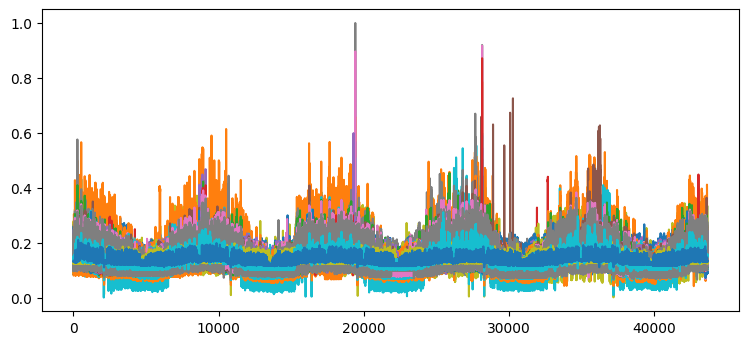

In [32]:
plt.plot(X[:,0])
plt.show()
del X

In [5]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=128, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.0001),
        ),
        layers.Conv1D(
            filters=64, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.0001)
        ),
        layers.Dropout(rate=0.1),
        layers.Conv1D(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.000001)
        ),
        layers.Conv1DTranspose(
            filters=4, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.000001)
        ),
        layers.Dropout(rate=0.1),
        layers.Conv1DTranspose(
            filters=64, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.0001)
        ),
        layers.Conv1DTranspose(
            filters=128, kernel_size=7, padding="same", strides=2, activation="relu", kernel_regularizer=regularizers.l2(0.0001)
        ),
        layers.Conv1DTranspose(filters=channels, kernel_size=7, padding="same", activation="relu"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 84, 128)           72704     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 42, 64)            57408     
_________________________________________________________________
dropout (Dropout)            (None, 42, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 4)             1796      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 42, 4)             116       
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 4)             0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 84, 64)            1

Epoch 1/10
246/246 [==============================] - 12s 18ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 2/10
246/246 [==============================] - 4s 14ms/step - loss: 7.5430e-04 - val_loss: 5.2520e-04
Epoch 3/10
246/246 [==============================] - 4s 15ms/step - loss: 5.0033e-04 - val_loss: 4.4706e-04
Epoch 4/10
246/246 [==============================] - 4s 14ms/step - loss: 4.4609e-04 - val_loss: 4.0586e-04
Epoch 5/10
246/246 [==============================] - 4s 14ms/step - loss: 4.2121e-04 - val_loss: 3.9057e-04
Epoch 6/10
246/246 [==============================] - 4s 14ms/step - loss: 4.0655e-04 - val_loss: 4.1923e-04
Epoch 7/10
246/246 [==============================] - 4s 14ms/step - loss: 3.9828e-04 - val_loss: 3.9085e-04
Epoch 8/10
246/246 [==============================] - 4s 14ms/step - loss: 3.8467e-04 - val_loss: 3.6807e-04
Epoch 9/10
246/246 [==============================] - 4s 14ms/step - loss: 3.8326e-04 - val_loss: 3.8974e-04
Epoch 10/10
246/246 [=====

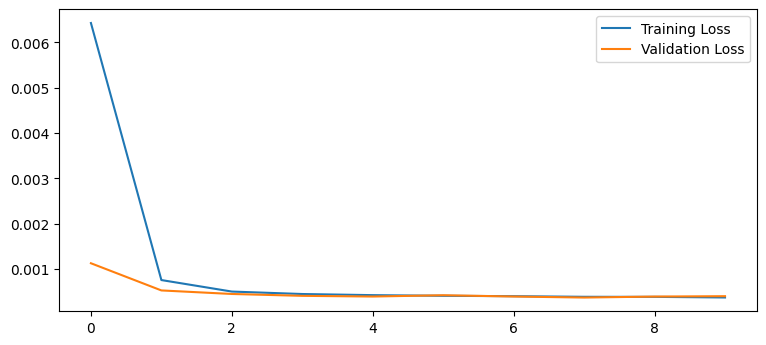

In [6]:
history = model.fit(
    x_train,
    x_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    shuffle=True,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="min")
    ],
)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [7]:
out = model.predict(x_test[0].reshape((1,time_steps,channels)))
print(x_test[0].reshape((1,time_steps,channels)).shape, out.shape)

(1, 168, 81) (1, 168, 81)


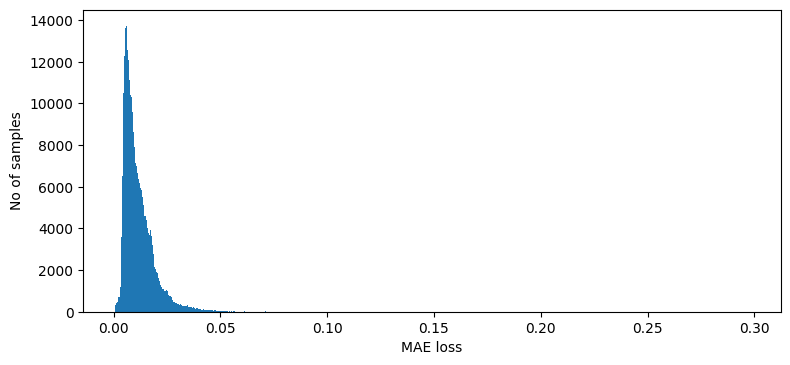

In [8]:
# test MAE loss.
x_test_pred = model.predict(x_test)
mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

plt.hist(mae_loss.flatten(), bins='auto')
plt.xlabel("MAE loss")
plt.ylabel("No of samples")


# Get reconstruction loss threshold.
threshold = np.max(mae_loss)
plt.show()

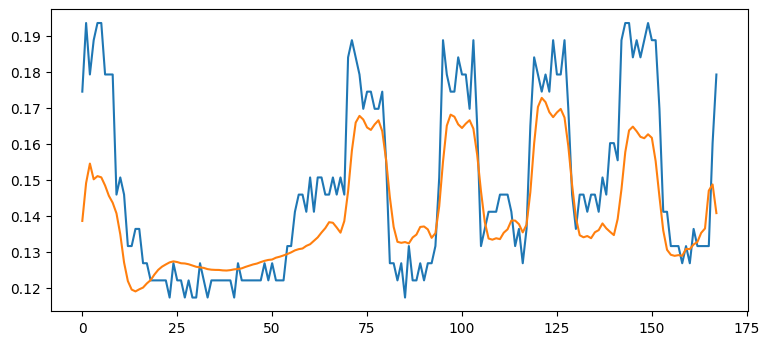

In [9]:
plt.plot(x_test[200,:,0])
plt.plot(x_test_pred[200,:,0])
plt.show()

In [10]:
class Anomaly:
    def __init__(self, name, start, end):
        self.name = name
        self.start = start
        self.end = end
        
    # same anomaly if they had the difference in interval is max 1 day from start and end
    def __eq__(self, other):
        if not isinstance(other, Anomaly):
            return False
        return self.name == other.name and abs(self.start - other.start) <= 24*7*2 and abs(self.end - other.end) <= 24*7*2
    
    def update(self, other):
        if self.end <= other.end:
            self.end = other.end
        
        if self.start >= other.end:
            self.start = other.start
        
    def __repr__(self):
        return f"({self.name}, start={self.start}, end={self.end})"
    
    def __iter__(self):
        return iter((self.name, self.start, self.end))

In [11]:
anomalies = mae_loss >= 0.04
anomalous_data_indices = []
x_train_pred = model.predict(x_train)

for data_idx in range(time_steps - 1, len(mae_loss) - time_steps + 1):
    idx = np.where(anomalies[data_idx - time_steps + 1 : data_idx])
    if np.any(idx):
        anomalous_data_indices.append([data_idx, idx[1][0]])
        
anomalies = np.stack(anomalous_data_indices)
final_anomalies = []

for anomaly in anomalous_data_indices:
    anomaly = Anomaly(anomaly[1], anomaly[0], anomaly[0]+time_steps)
    if anomaly not in final_anomalies:
        final_anomalies.append(anomaly)
    else:
        idx = final_anomalies.index(anomaly)
        final_anomalies[idx].update(anomaly)

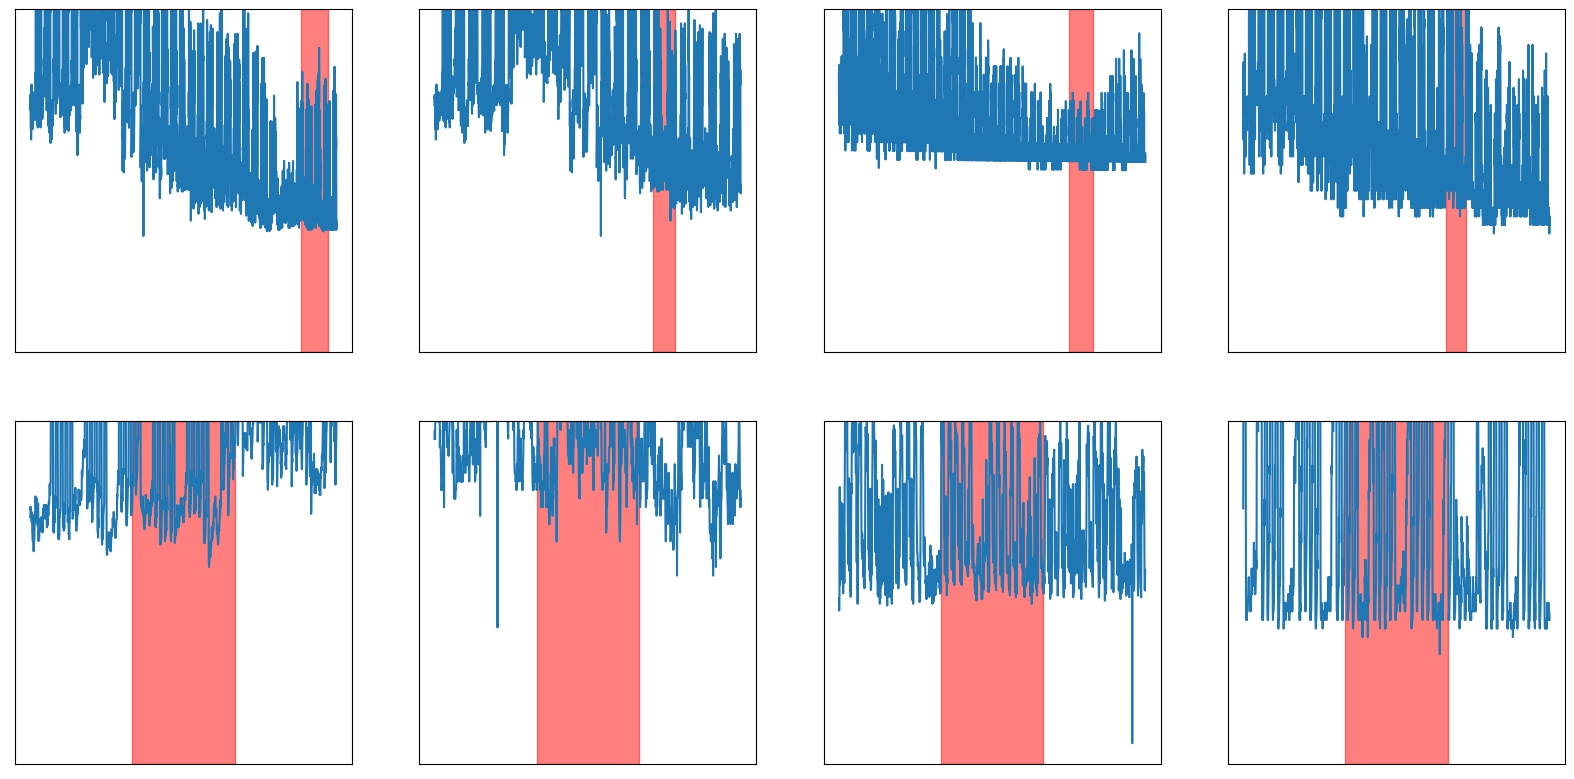

In [12]:
n = 4
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    channel, start_idx, end_idx = final_anomalies[i*2]
    padding = (end_idx-start_idx)*10
    plt.plot(values[max(start_idx-padding, 0):min(end_idx+padding, len(values)), channel])
    interval = end_idx - start_idx
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.set_ylim(0,40)
    plt.axvspan(padding, padding+interval, color='red', alpha=0.5)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    channel, start_idx, end_idx = final_anomalies[i*2 +1]
    padding = end_idx-start_idx
    plt.plot(values[max(start_idx-padding, 0):min(end_idx+padding, len(values)), channel])
    interval = end_idx - start_idx
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.set_ylim(0,40)
    plt.axvspan(padding, padding+interval, color='red', alpha=0.5)
    ax.get_yaxis().set_visible(False)
plt.show()

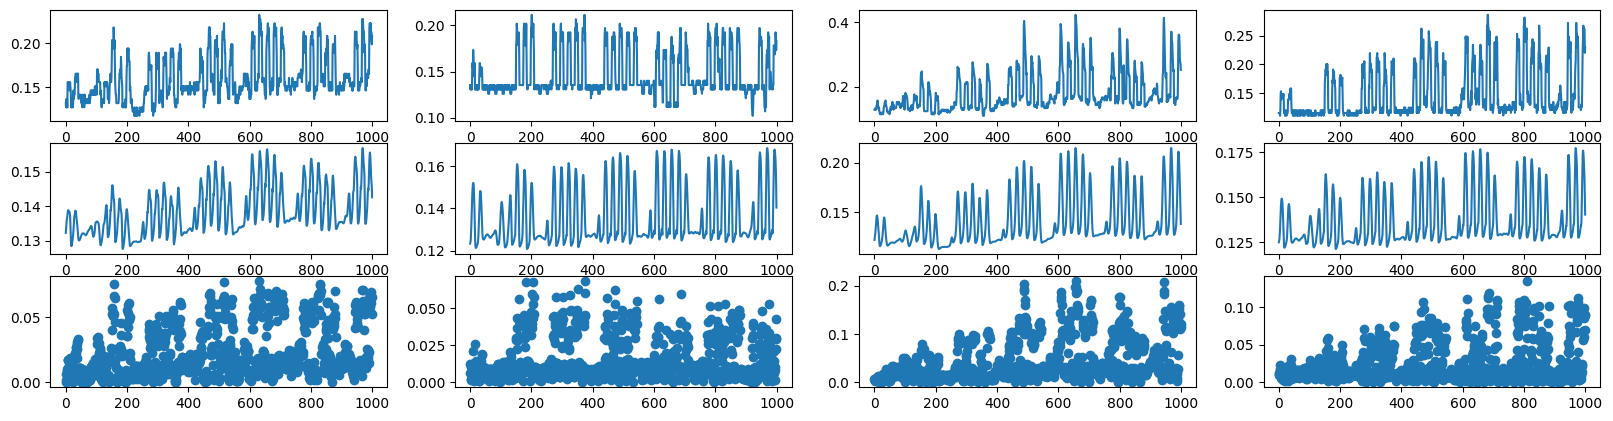

In [13]:
n = 4
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.plot(x_test[:1000,0,i])
    ax = plt.subplot(3, n, i + 1 + n)
    plt.plot(x_test_pred[:1000,0,i])
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    res = np.abs(x_test[:1000,0,i] - x_test_pred[:1000,0,i])
    plt.scatter(range(len(res)), res)
    
plt.show()

In [14]:
anomalies = []

mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
print(mae_loss.shape, x_train_pred.shape)
for t, mae in enumerate(mae_loss):
    channel = np.where(mae > 0.02)
    if np.any(channel):
        #print(channel[0], mae)
        anomalies.append([t, channel[0][0]])
        #print(t, channel, mae[channel[0]])
        
anomalies = np.stack(anomalies)
print(anomalies.shape)
# print(anomalies)

def create_intervals(anomaly_points):
    # anomaly points must be: #anomalies x [idx, channel]
    intervals = {} # key = channel. value = [[start, end], [start, end]...]
    discontinuity = 48
    anomaly_points = anomaly_points.copy()
    for channel in set(anomalies[:,1]):
        channel_points = anomaly_points[np.where(channel == anomaly_points[:,1])][:,0]
        
        channel_points.sort()
        channel_points = list(channel_points)
        channel_intervals = []
        #print(channel_points)
        
        start = channel_points.pop(0)
        prev = start
        while channel_points:
            current = channel_points.pop(0)
            if current - prev > discontinuity:
                if start != prev:
                    channel_intervals.append([start, prev])
                start = current
            prev = current
        
        if channel_intervals:
            intervals[str(channel)] = channel_intervals
    return intervals
        
anomaly_intervals = create_intervals(anomalies)
print(anomaly_intervals)

(34944, 81) (34944, 168, 81)
(29642, 2)
{'2': [[35, 539], [607, 783], [995, 996], [1833, 1887], [1976, 1981], [7083, 7143], [7488, 7742], [7905, 8388], [8460, 9256], [9419, 9988], [10067, 10358], [15297, 15609], [16044, 16256], [16764, 16789], [16892, 17077], [17268, 17677], [17740, 17819], [18080, 18471], [18824, 18854], [18921, 19021], [19904, 19930], [25107, 25586], [26024, 26821], [26912, 27851], [27921, 27928], [27991, 28059], [28160, 28329], [33367, 33372], [33441, 33469], [33970, 33980], [34089, 34143], [34207, 34235]], '3': [[8133, 8154], [8321, 8341], [9231, 9276], [9393, 9401], [10020, 10021], [10108, 10267], [10359, 10376], [15420, 15482], [15589, 15654], [15772, 15829], [16241, 16569], [17347, 17378], [18472, 18525], [19812, 19817], [24148, 24244], [24445, 25106], [26005, 26023], [26299, 26334], [26518, 26529], [26822, 26911], [27110, 27146], [28170, 28185], [28330, 28354], [28762, 29054], [29147, 29293], [33259, 34303], [34353, 34423]], '5': [[14715, 14973]], '7': [[316, 3

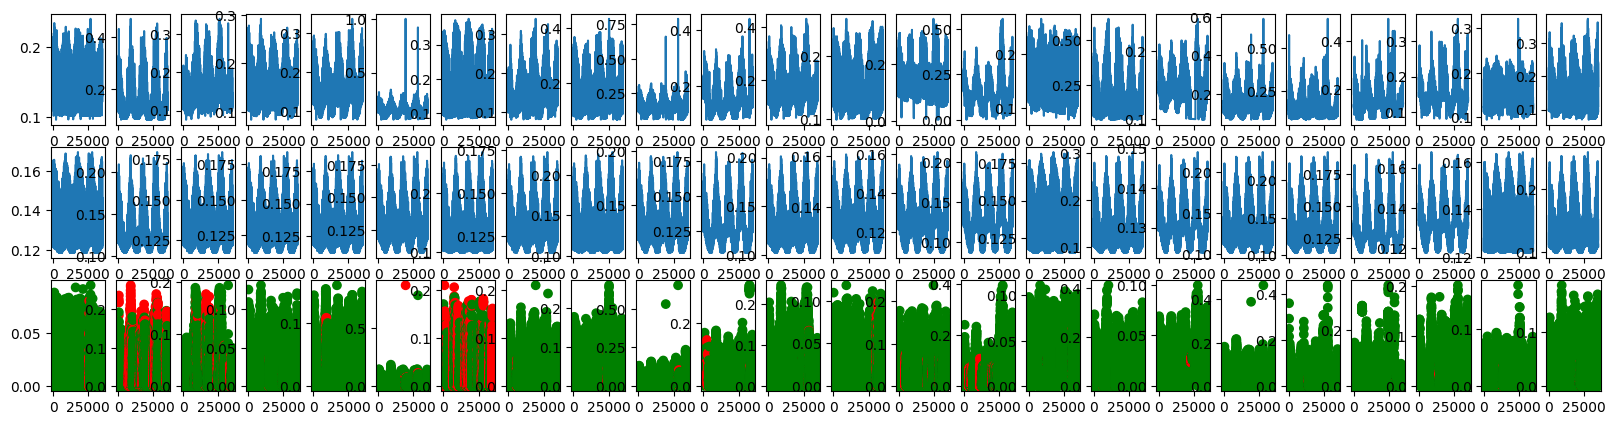

In [15]:
n = len(set(anomalies[:,1]))

plt.figure(figsize=(20, 5))
for i, c in enumerate(set(anomalies[:,1])):
    ax = plt.subplot(3, n, i + 1)
    plt.plot(x_train[:,0,c])
    ax = plt.subplot(3, n, i + 1 + n)
    plt.plot(x_train_pred[:,0,c])
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    res = np.abs(x_train[:,0,c] - x_train_pred[:,0,c])
    channel_anomalies = anomalies[np.where(anomalies[:,1] == c)]
    colors = np.array(["green"] * x_train_pred.shape[0])
    colors[channel_anomalies[:,0]] = ["red"]
    plt.scatter(range(len(res)), res, color=colors, cmap='hsv')
    
plt.show()

4
2 35 539
2 607 783
2 995 996
2 1833 1887
2 1976 1981
2 7083 7143
2 7488 7742
2 7905 8388
2 8460 9256
2 9419 9988
2 10067 10358
2 15297 15609
2 16044 16256
2 16764 16789
2 16892 17077
2 17268 17677
2 17740 17819
2 18080 18471
2 18824 18854
2 18921 19021
2 19904 19930
2 25107 25586
2 26024 26821
2 26912 27851
2 27921 27928
2 27991 28059
2 28160 28329
2 33367 33372
2 33441 33469
2 33970 33980
2 34089 34143
2 34207 34235
3 8133 8154
3 8321 8341
3 9231 9276
3 9393 9401
3 10020 10021
3 10108 10267
3 10359 10376
3 15420 15482
3 15589 15654
3 15772 15829
3 16241 16569
3 17347 17378
3 18472 18525
3 19812 19817
3 24148 24244
3 24445 25106
3 26005 26023
3 26299 26334
3 26518 26529
3 26822 26911
3 27110 27146
3 28170 28185
3 28330 28354
3 28762 29054
3 29147 29293
3 33259 34303
3 34353 34423
5 14715 14973
7 316 342
7 1044 1046
7 2066 2074
7 2131 2191
7 18951 19092
7 19250 19416
7 19941 19982
7 27987 27988
7 28057 28094
7 28355 28404


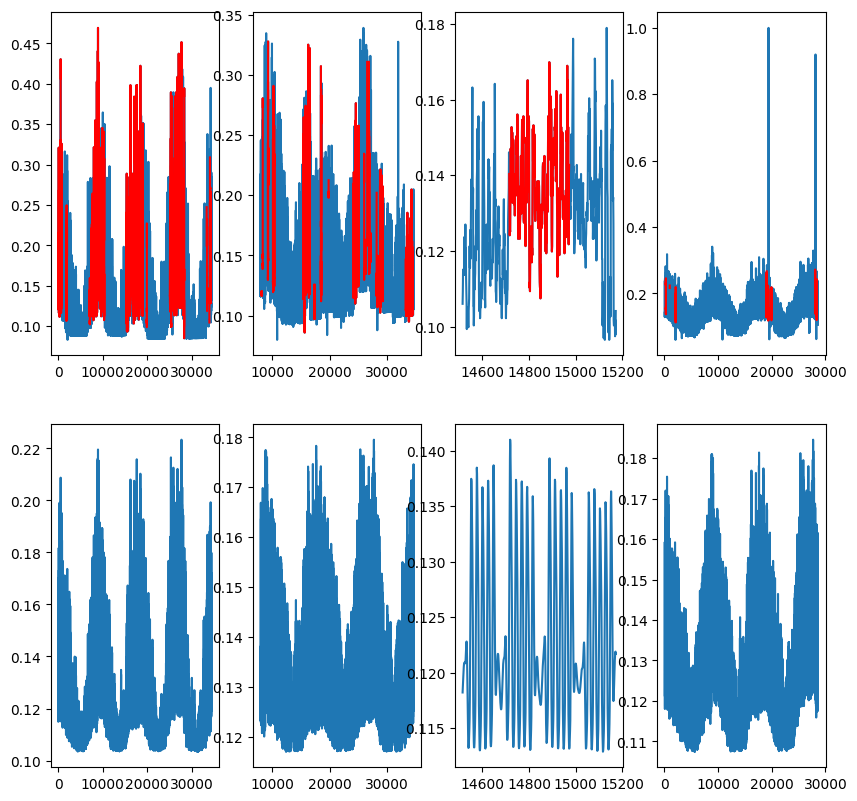

In [16]:
n = min(len(anomaly_intervals), 4)
print(n)
plt.figure(figsize=(10,10))
for i, c in enumerate(anomaly_intervals.keys()):
    if i >= n:
        break
    c = int(c)         
    ax = plt.subplot(2, n, i + 1)
    s = max(0, anomaly_intervals[str(c)][0][0] - 200)
    e = min(anomaly_intervals[str(c)][-1][1] + 200, x_train.shape[0])
    ax.plot(range(s, e), x_train[s:e,0,c])
    for start, end in anomaly_intervals[str(c)]:
        print(c, start,end)
        ax.plot(range(start, end), x_train[start:end,0,c], color="red")
        
    ax = plt.subplot(2, n, i + 1 + n)
    ax.plot(range(s, e), x_train_pred[s:e,0,c])
        
    
plt.show()

5 14715 14973


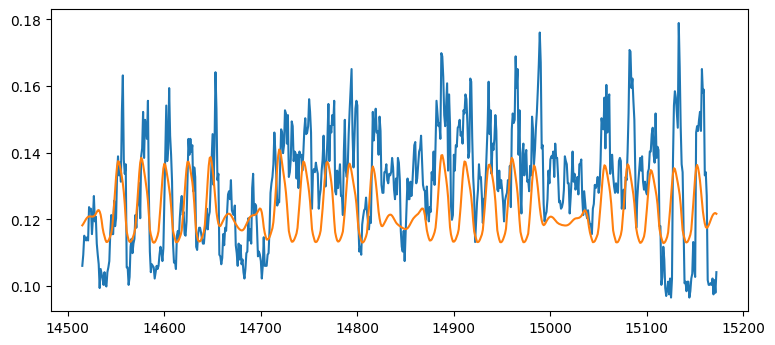

In [22]:
c = str(random.choice(list(anomaly_intervals)))
s = max(0, anomaly_intervals[c][0][0] - 200)
e = min(anomaly_intervals[c][-1][1] + 200, x_train.shape[0])
plt.plot(range(s, e), x_train[s:e,0,int(c)])
for start, end in anomaly_intervals[c]:
    print(c, start,end)
    #plt.plot(range(start, end), x_train[start:end,0,int(c)], color="red")
plt.plot(range(s, e), x_train_pred[s:e,0,int(c)])
plt.show()

NameError: name 'X' is not defined

In [ ]:
plt.plot()